### **Exploratory Data Analysis and Pre-Processing**

In [99]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Project/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [102]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


1.Data contains 11 column and 16598 unique values

2.there are 271 missing values in Year column and 58 ones in Publisher

In [104]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

**CHECK** **DUPLICATION**

In [105]:
len(df)-len(df.drop_duplicates())

0

In [106]:
# null values are little so i will drop them
df.dropna(inplace=True)
df['Year']=df['Year'].astype(int)
df['Publisher']=df['Year'].astype(int)

In [107]:
df.describe()

,Rank,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [108]:
df["NA_Sales"].describe()

count    16291.000000
mean         0.265647
std          0.822432
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

In [109]:
df["Global_Sales"].describe()

count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

In [110]:
df["JP_Sales"].describe()

count    16291.000000
mean         0.078833
std          0.311879
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64

In [111]:
df["EU_Sales"].describe()

count    16291.000000
mean         0.147731
std          0.509303
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64

In [112]:
df["Other_Sales"].describe()

count    16291.000000
mean         0.048426
std          0.190083
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64

In [113]:
c = df.columns
for col in c :
    print("les unique valeurs dans ",col,"  =",df[col].value_counts())
    print("----------------------")

les unique valeurs dans  Rank   = 1        1
11062    1
11049    1
11050    1
11051    1
        ..
5522     1
5523     1
5524     1
5525     1
16600    1
Name: Rank, Length: 16291, dtype: int64
----------------------
les unique valeurs dans  Name   = Need for Speed: Most Wanted    12
FIFA 14                         9
Ratatouille                     9
LEGO Marvel Super Heroes        9
Cars                            8
                               ..
PGA Tour 96                     1
Game & Wario                    1
Angry Birds                     1
Shadow Hearts: Covenant         1
Know How 2                      1
Name: Name, Length: 11325, dtype: int64
----------------------
les unique valeurs dans  Platform   = DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98


In [114]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [115]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['Name', 'Platform','Genre', 'Publisher']
numericals = ['Rank', 'Year', 'NA_Sales','JP_Sales', 'Other_Sales', 'Global_Sales']

In [116]:
# numerical statistical summary
df[numericals].describe()

,Rank,Year,NA_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,10.220000,10.570000,82.740000


In [117]:
# categoricals statistical summary
df[categoricals].describe()

,Publisher
count,16291.000000
mean,2006.405561
std,5.832412
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


**Explore Data Analysis**

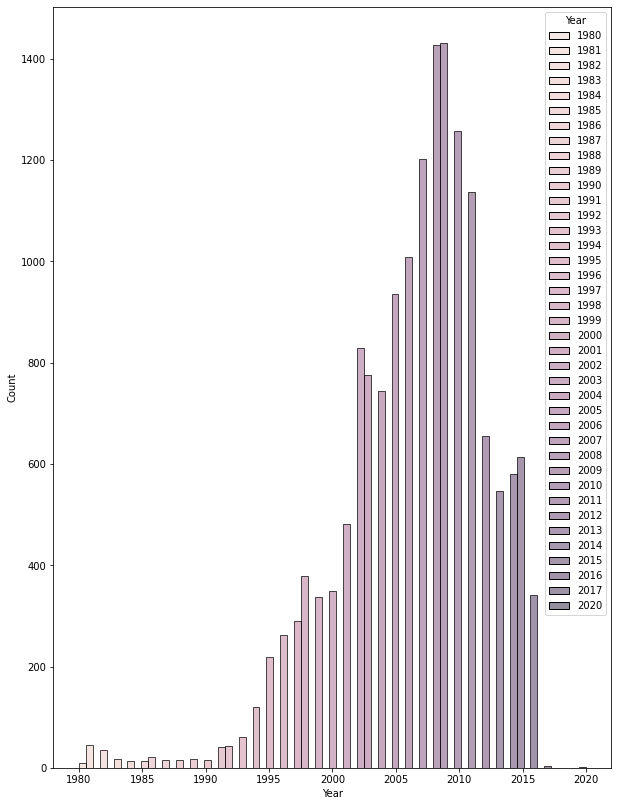

In [118]:
plt.figure(figsize=(10,14))
sns.histplot(data=df, x="Year", hue="Year")
plt.show()

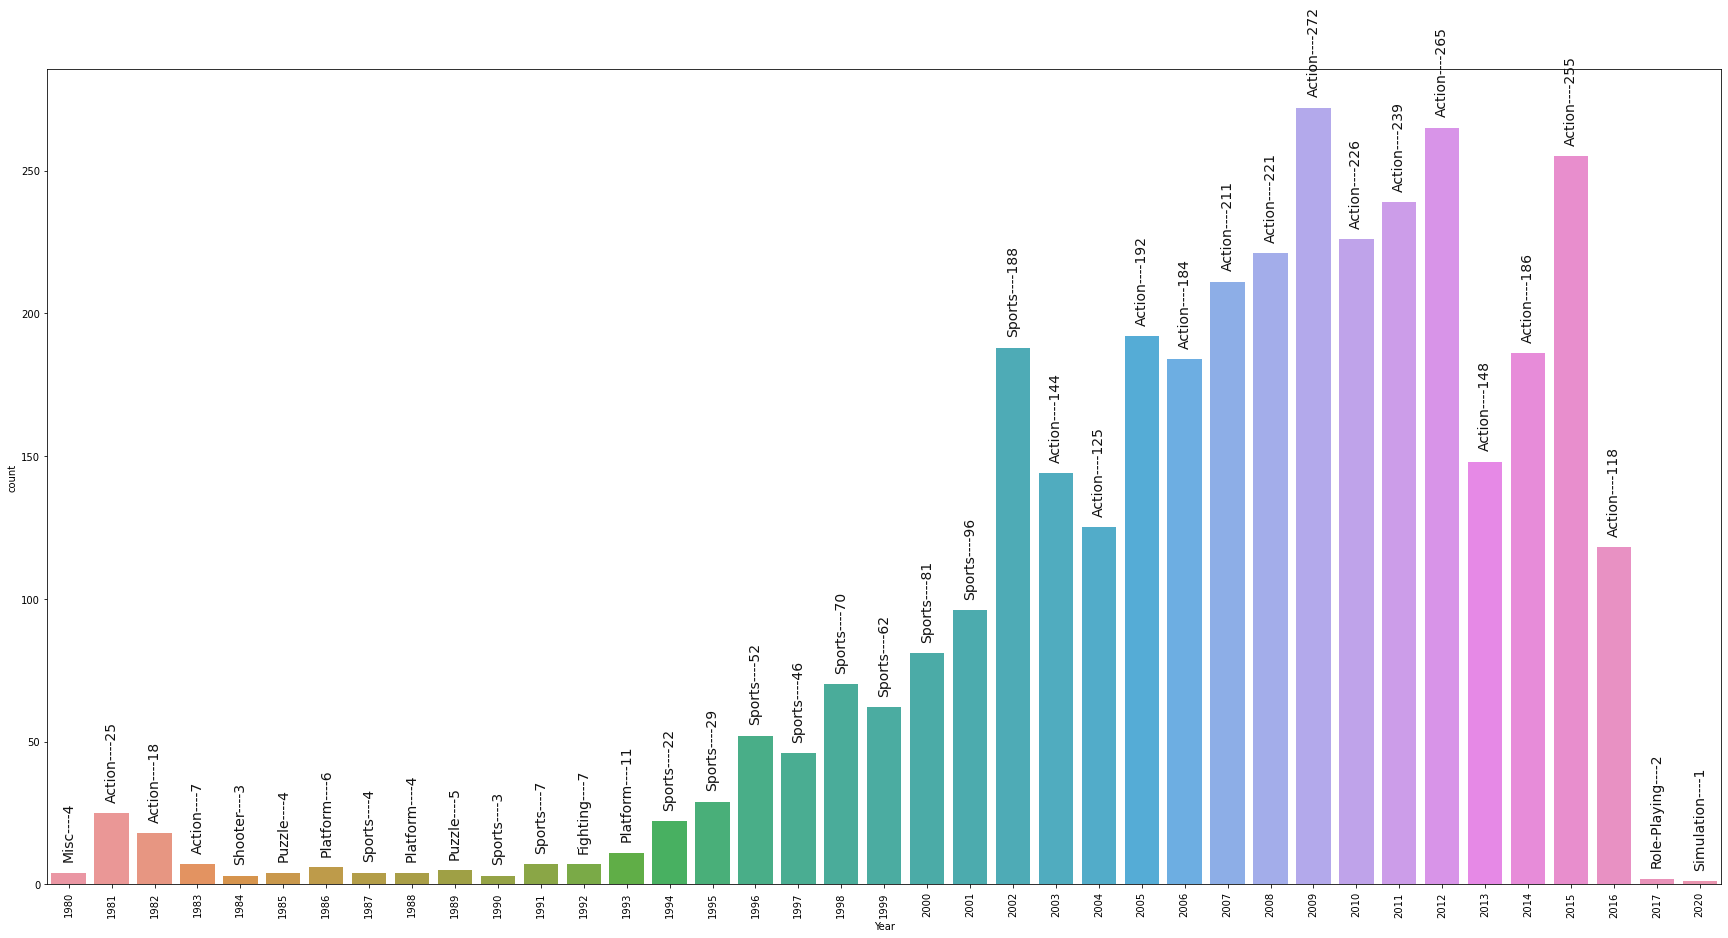

In [119]:
year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
genre = year_max_genre['Genre'].values

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#111', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

In [120]:
Top50byPublisher = df.nlargest(50, 'Global_Sales')[['Global_Sales', 'Name', 'Publisher']]
Top50byPublisher = Top50byPublisher.groupby(pd.Grouper(key='Publisher')).size().reset_index(name='Number of Games')
Top50byPublisher

,Publisher,Number of Games
0,2006,4
1,1985,1
2,2008,2
3,2009,5
4,1996,2
5,1989,2
6,1984,1
7,2005,5
8,1999,1
9,2007,3


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

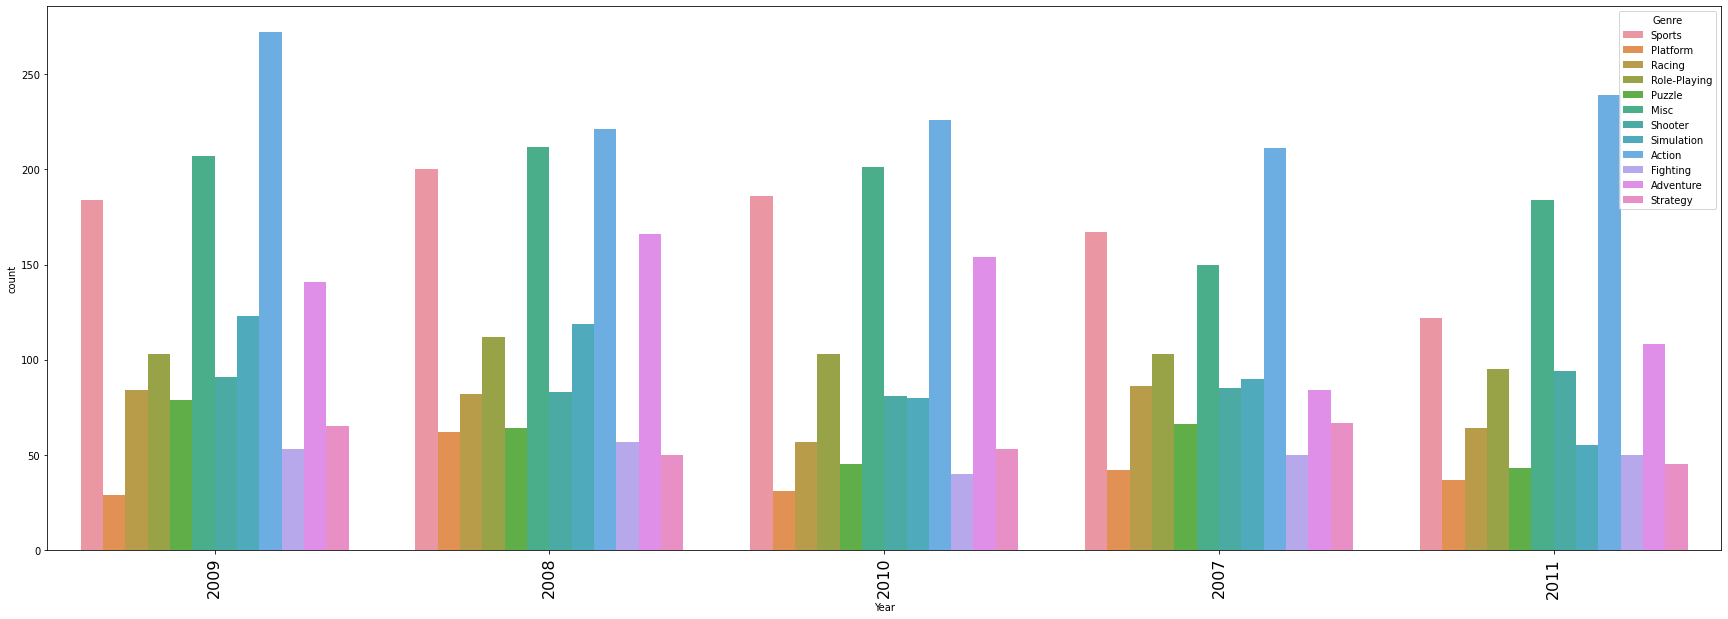

In [121]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


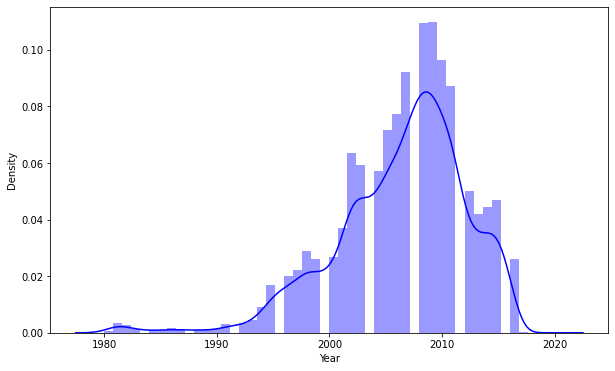

In [122]:
ax=plt.figure(figsize=(10,6))
sns.distplot(df['Year'],color='blue')

Text(0.5, 1.0, 'Sales of different genre in Global_Sales')

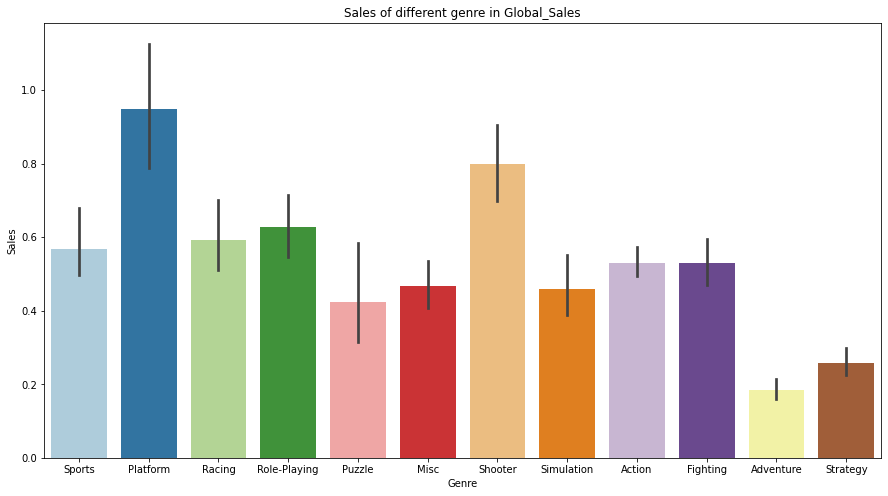

In [123]:
ax=plt.figure(figsize=(15,8))
sns.barplot(x='Genre',y='Global_Sales',data=df,palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre in Global_Sales')

**Boxplot to Detect Outliers**

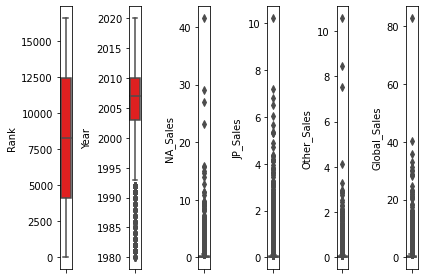

In [124]:
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

**Heat map to show Correlations**

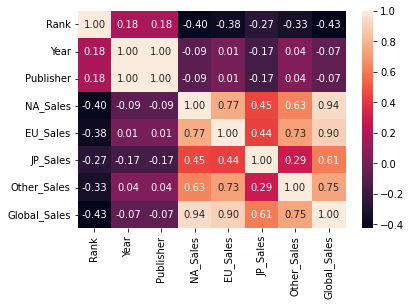

In [125]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [126]:
d = df.Genre.value_counts()
d

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

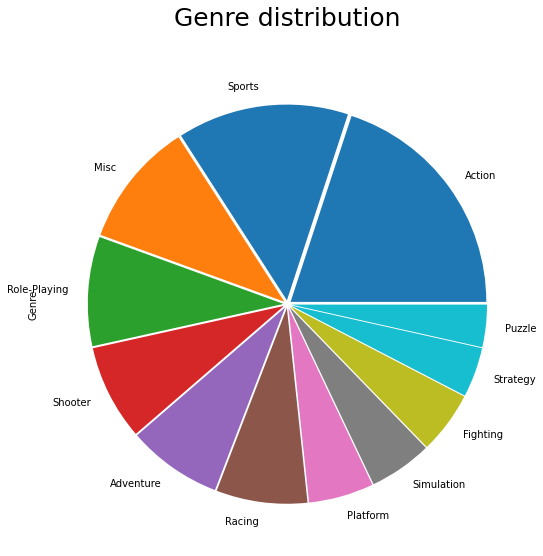

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,9))
d.plot(kind='pie', colormap="tab10", explode=[0.02]*12)
plt.title("Genre distribution\n", fontsize=25)
plt.show()

Text(0.5, 1.0, 'Global sales with different platforms')

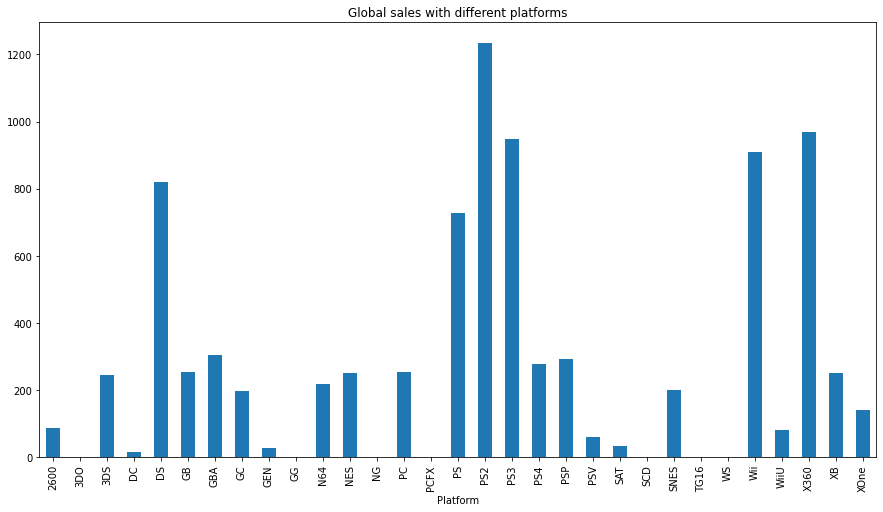

In [128]:
ax=plt.figure(figsize=(15,8))
d = df.groupby(['Platform'])['Global_Sales']
d.sum().plot.bar()
plt.title('Global sales with different platforms')

Text(0.5, 1.0, 'Other sales with different platforms')

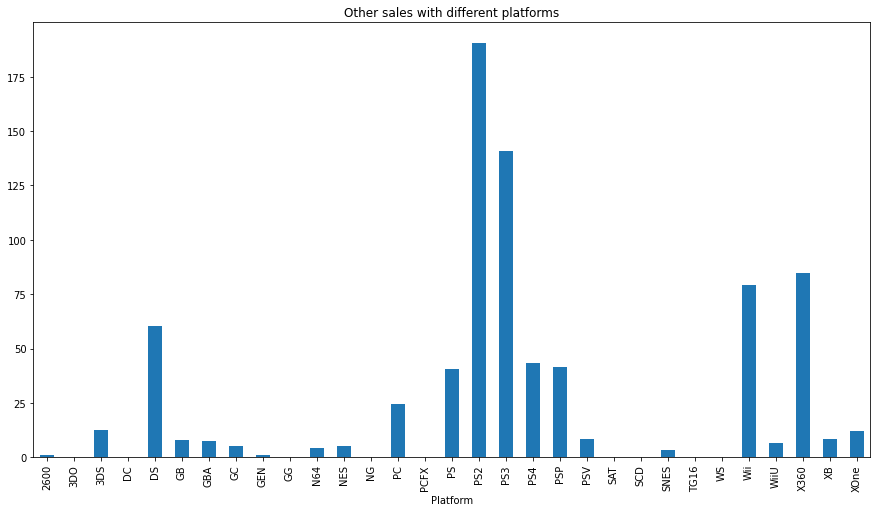

In [129]:
ax=plt.figure(figsize=(15,8))
d = df.groupby(['Platform'])['Other_Sales']
d.sum().plot.bar()
plt.title('Other sales with different platforms')

Rank               AxesSubplot(0.125,0.657941;0.133621x0.222059)
Year            AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Publisher        AxesSubplot(0.44569,0.657941;0.133621x0.222059)
NA_Sales        AxesSubplot(0.606034,0.657941;0.133621x0.222059)
EU_Sales        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
JP_Sales           AxesSubplot(0.125,0.391471;0.133621x0.222059)
Other_Sales     AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Global_Sales     AxesSubplot(0.44569,0.391471;0.133621x0.222059)
dtype: object

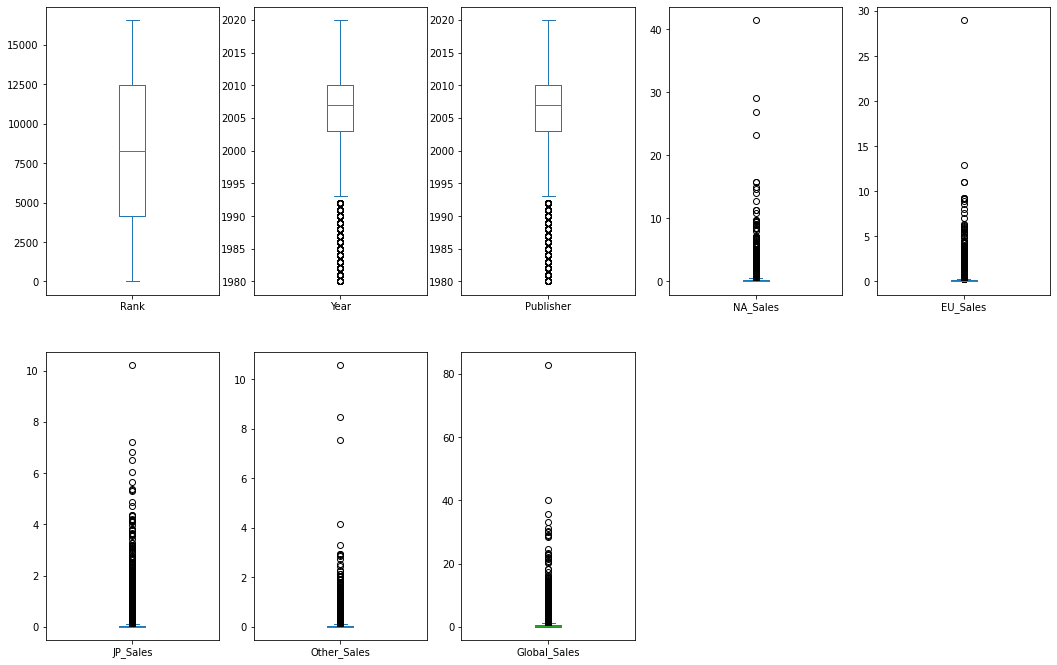

In [130]:
df.plot(kind = "box" , subplots = True , figsize = (18,18), layout = (3,5))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 30.47140487188924)

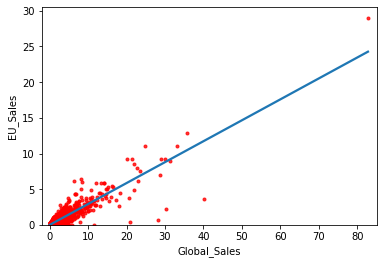

In [131]:
g = sns.regplot(df.Global_Sales,df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

In [132]:
df = df.drop([0],axis=0) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 13.52411103334368)

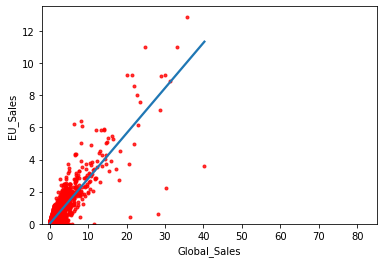

In [133]:
g = sns.regplot(df.Global_Sales,df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

In [134]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,1985,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,2008,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,2009,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,1996,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,1989,23.20,2.26,4.22,0.58,30.26


**Label Encoder to Prepare X and Y**

In [135]:
from sklearn.preprocessing import LabelEncoder

dff = df.copy()

le = LabelEncoder()

feature = ["Platform", "Genre"]


for col in feature:
    dff[col] = le.fit_transform(df[col])

In [136]:
dff.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,11,1985,4,1985,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,2008,6,2008,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,2009,10,2009,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,1996,7,1996,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,5,1989,5,1989,23.20,2.26,4.22,0.58,30.26


In [137]:
X = dff[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

y = dff['Global_Sales'].values

**Train Test**

In [138]:
X.shape

(16290, 6)

In [139]:
y.shape

(16290,)

In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [141]:
from sklearn.preprocessing import RobustScaler
ro = RobustScaler()

In [142]:
x_train = ro.fit_transform(x_train)
x_test = ro.fit_transform(x_test)


### **Data Modelling**

In [143]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report, roc_curve

**Regressor Score**

**Random Forest Regressor**

In [144]:
rf = RandomForestRegressor()
rf.fit(x_train , y_train)

RandomForestRegressor()

In [145]:
rf.score(x_train,y_train)

0.9970770140511229

In [146]:
rf.score(x_test,y_test)

0.9593301916907486

In [147]:
yRandomPre= rf.predict(x_test)

In [148]:
r2Random = r2_score(y_test , yRandomPre)
r2Random

0.9593301916907486

In [149]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yRandomPre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.030926642939006103


In [150]:
dbRandom = pd.DataFrame({'Actual': y_test, 'Predicted': yRandomPre})
dbRandom

,Actual,Predicted
0,0.57,0.572450
1,0.02,0.020000
2,0.33,0.320700
3,0.67,0.632200
4,0.15,0.155277
...,...,...
4068,0.05,0.043790
4069,0.23,0.238900
4070,2.20,2.247800
4071,0.19,0.190000


<Figure size 1152x576 with 0 Axes>

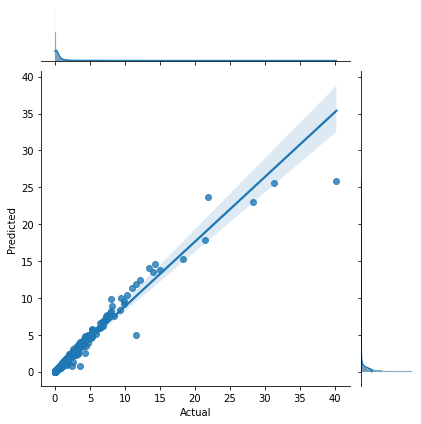

In [151]:
test = pd.DataFrame({'Predicted':yRandomPre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

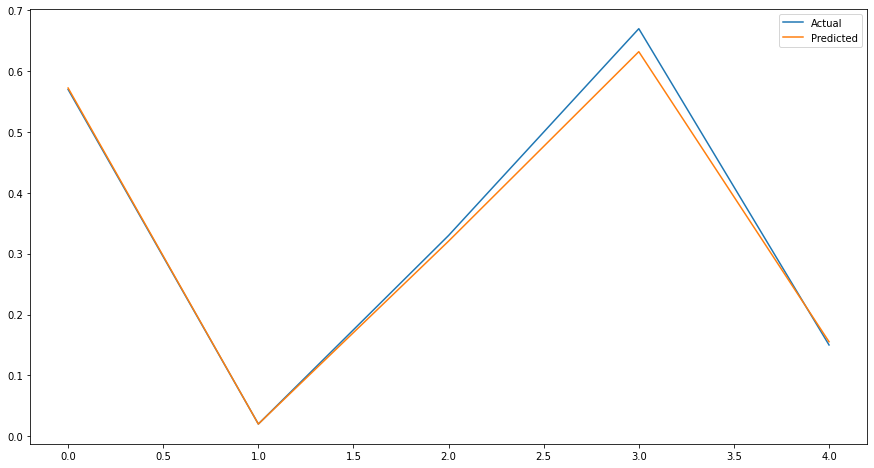

In [152]:
dbRandom1 = dbRandom.head()
dbRandom1.plot(kind='line',figsize=(15,8))
plt.show()

In [153]:
rf.feature_importances_

array([0.00132508, 0.00120981, 0.79557534, 0.15710216, 0.0316936 ,
       0.01309402])

**KNN**

In [154]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [155]:
knn.score(x_train,y_train)

0.9830286155722257

In [156]:
knn.score(x_test , y_test)

0.9134505144593599

In [157]:
pred = knn.predict(x_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.9134505144593599


In [158]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(pred, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.046915295850724285


In [159]:
dbKNN = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
dbKNN

,Actual,Predicted
0,0.57,0.560
1,0.02,0.020
2,0.33,0.320
3,0.67,0.578
4,0.15,0.150
...,...,...
4068,0.05,0.022
4069,0.23,0.254
4070,2.20,2.180
4071,0.19,0.190


<Figure size 1152x576 with 0 Axes>

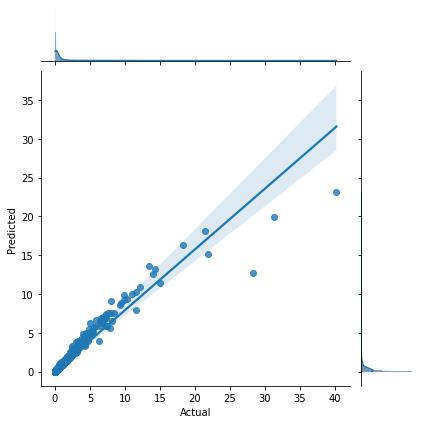

In [160]:
test = pd.DataFrame({'Predicted':pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

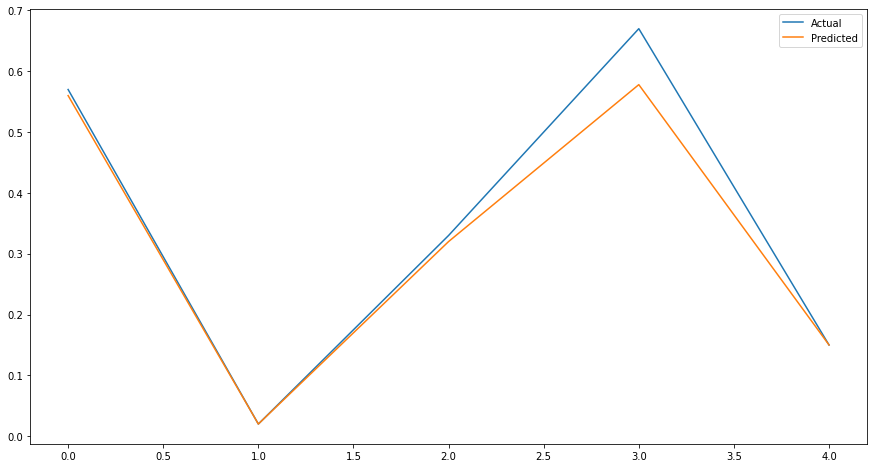

In [161]:
dbKNN1 = dbKNN.head()
dbKNN1.plot(kind='line',figsize=(15,8))
plt.show()

**Decision Tree Regressor**

In [162]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [163]:
regressor.score(x_train,y_train)

0.9999977849831169

In [164]:
regressor.score(x_test,y_test)

0.9592774363217897

In [165]:
yTreePre= regressor.predict(x_test)

In [166]:
r2Tree= r2_score(y_test ,yTreePre )
r2Tree

0.9592774363217897

In [167]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yTreePre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.04755381700934249


In [168]:
db = pd.DataFrame({'Actual': y_test, 'Predicted': yTreePre})
db

,Actual,Predicted
0,0.57,0.570000
1,0.02,0.020000
2,0.33,0.320000
3,0.67,0.620000
4,0.15,0.155000
...,...,...
4068,0.05,0.043333
4069,0.23,0.240000
4070,2.20,2.280000
4071,0.19,0.190000


<Figure size 1152x576 with 0 Axes>

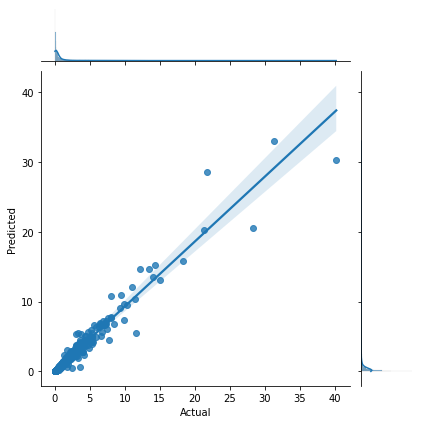

In [169]:
test = pd.DataFrame({'Predicted':yTreePre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

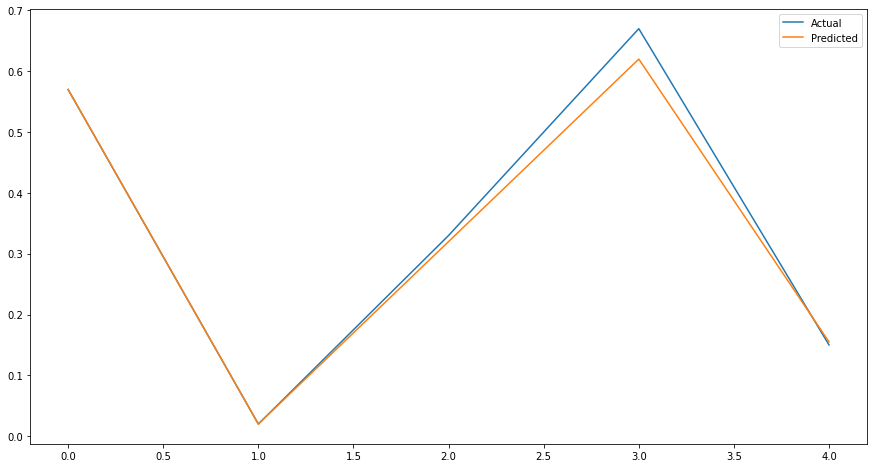

In [170]:
db1 = db.head()
db1.plot(kind='line',figsize=(15,8))
plt.show()

**Ridge**

In [171]:
# define ridge regression model
from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)

In [172]:
rid = Ridge()
rid.fit(x_train,y_train)

Ridge()

In [173]:
rid.score(x_train,y_train)

0.9999861192147286

In [174]:
rid.score(x_test,y_test)

0.999987986050178

In [175]:
yRidPre = rid.predict(x_test)

In [176]:
r2Rid = r2_score(y_test ,yRidPre )
r2Rid

0.999987986050178

In [177]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yRidPre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.0029551375102583543


In [178]:
dbRidge = pd.DataFrame({'Actual': y_test, 'Predicted': yRidPre})
dbRidge

,Actual,Predicted
0,0.57,0.570265
1,0.02,0.020326
2,0.33,0.320226
3,0.67,0.670218
4,0.15,0.150223
...,...,...
4068,0.05,0.040200
4069,0.23,0.240351
4070,2.20,2.200274
4071,0.19,0.190430


In [179]:
x_test.shape

(4073, 6)

In [180]:
y_test.shape

(4073,)

<Figure size 1152x576 with 0 Axes>

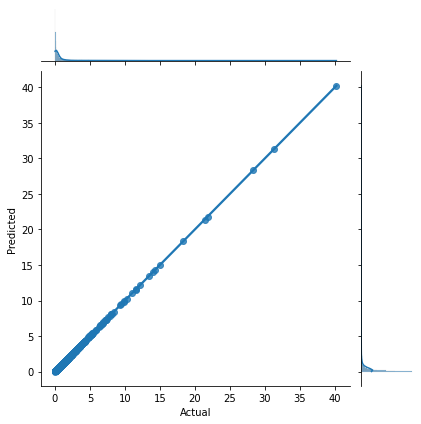

In [181]:
test = pd.DataFrame({'Predicted':yRidPre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

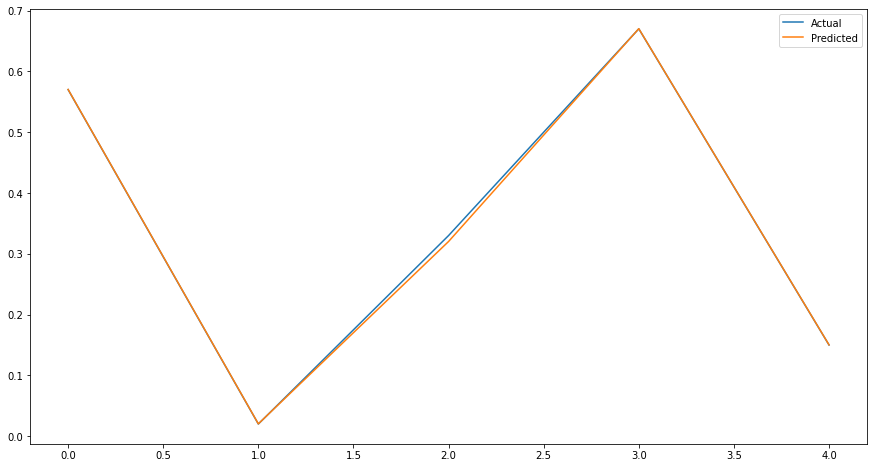

In [182]:
dbridge1 = dbRidge.head()
dbridge1.plot(kind='line',figsize=(15,8))
plt.show()

In [183]:
rid.coef_

array([-1.08639110e-04, -4.71152381e-05,  2.39991637e-01,  1.10008370e-01,
        3.99908258e-02,  3.99685165e-02])

**Linear Regression**

In [184]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [185]:
lr.score(x_train,y_train)

0.9999861192562169

In [186]:
lr.score(x_test,y_test)

0.9999879850329042

In [187]:
yLinearPre = lr.predict(x_test)

In [188]:
r2Linear = r2_score(y_test , yLinearPre)
r2Linear

0.9999879850329042

<Figure size 1152x576 with 0 Axes>

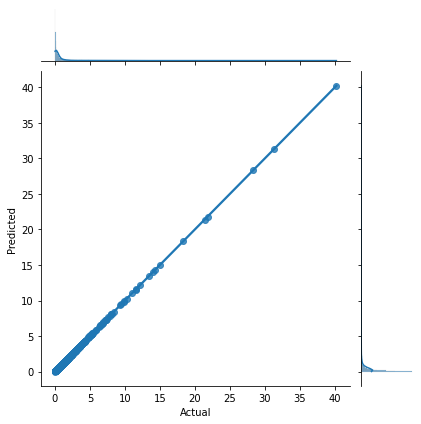

In [189]:
test = pd.DataFrame({'Predicted':yLinearPre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [190]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yLinearPre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.0029547715225954007


In [191]:
dbLinear = pd.DataFrame({'Actual': y_test, 'Predicted': yLinearPre})
dbLinear

,Actual,Predicted
0,0.57,0.570270
1,0.02,0.020324
2,0.33,0.320229
3,0.67,0.670215
4,0.15,0.150223
...,...,...
4068,0.05,0.040197
4069,0.23,0.240351
4070,2.20,2.200280
4071,0.19,0.190427


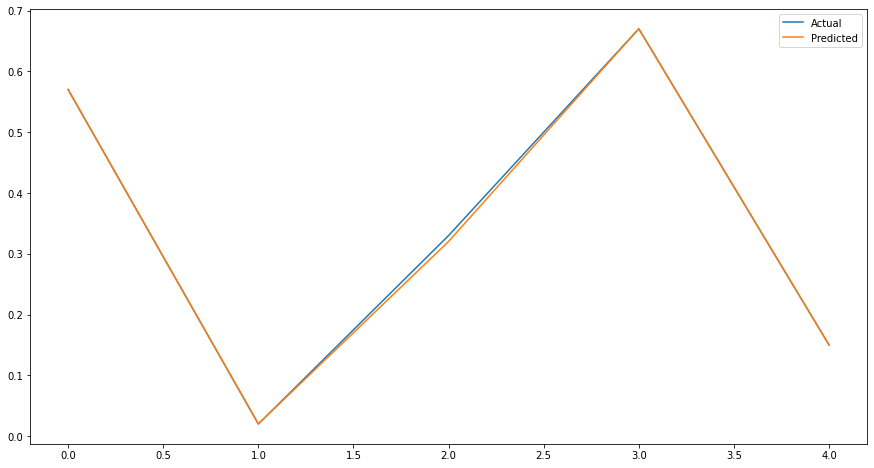

In [192]:
dbLinear1 = dbLinear.head()
dbLinear1.plot(kind='line',figsize=(15,8))
plt.show()

In [193]:
lr.coef_

array([-1.09384339e-04, -4.72731391e-05,  2.39996484e-01,  1.10007377e-01,
        3.99904466e-02,  3.99673977e-02])

In [194]:
import statsmodels.api as sm
import numpy as np
np.random.seed(1)
m = sm.add_constant(X)
est = sm.OLS(y, m)
est2 = est.fit()
print(est2.params)

[ 4.76457202e-04 -9.44528385e-06 -6.76156906e-07  9.99946770e-01
  9.99943041e-01  9.99876334e-01  9.99612604e-01]


In [195]:
import statsmodels.api as sm
from scipy import stats
m = sm.add_constant(X)
est=sm.OLS(y,m)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.032e+08
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:59:44   Log-Likelihood:                 62487.
No. Observations:               16290   AIC:                        -1.250e+05
Df Residuals:                   16283   BIC:                        -1.249e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      4.638      0.0

## **Conclusion**
1.Top 5 Video Games in Year is Action and the lower is Puzzle Games

2.In 2005 and 2009 publishers created the most games

3.Most published type of games is Action

4.At the Global Sales, PS2 are the best seller

5.best Models are Ridge and Linear Regression
